In [14]:
import os
import glob

import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras


In [16]:
# load image
path_dir = os.path.join(os.getcwd(), '1class')
path_dir = sorted(glob.glob(path_dir + '/*'))

Non_Thanh = glob.glob(path_dir[0] + '/*.jpg')
Thanh = glob.glob(path_dir[1] + '/*.jpg')

In [21]:
img_cnt = len(Non_Thanh) + len(Thanh)
print(img_cnt)

class_names = ['Non_Thanh', 'Thanh']
num_classes = len(class_names)
print(class_names)

99
['Non_Thanh', 'Thanh']


In [22]:
def load_image(path, img_size=(180, 180)):
    img = cv2.imread(path, 1)
    img = cv2.resize(img, img_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img

In [23]:
def load_images(path_dir):
    images = []
    labels = []

    path_dir = sorted(glob.glob(path_dir + '/*'))
    print(path_dir)
    for paths in path_dir:
        paths = sorted(glob.glob(paths + '/*.jpg'))
        for path in paths:
            img = load_image(path)
            images.append(img)
            labels.append(class_names.index(os.path.basename(os.path.dirname(path))))
    return np.array(images), np.array(labels)

In [24]:
data_dir = os.path.join(os.getcwd(), '1class')
dataset = load_images(data_dir)

['/content/1class/Non_Thanh', '/content/1class/Thanh']


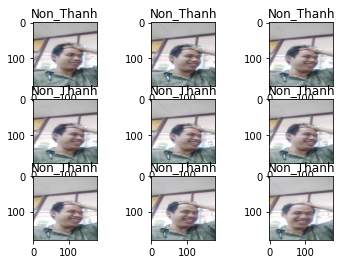

In [25]:
for i in range(9):
  # print(class_names[dataset[1][i]])
  plt.subplot(3, 3, i+1)
  plt.title(class_names[dataset[1][i]])
  plt.imshow(dataset[0][i])


In [26]:
print(dataset[0].shape)
print(dataset[1].shape)

(99, 180, 180, 3)
(99,)


In [27]:
# train test split
train_images, test_images, train_labels, test_labels = train_test_split(dataset[0], dataset[1], test_size=0.2, random_state=42)
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(79, 180, 180, 3)
(20, 180, 180, 3)
(79,)
(20,)


In [28]:
train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = keras.utils.np_utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.np_utils.to_categorical(test_labels, num_classes)

print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(79, 97200)
(20, 97200)
(79, 2)
(20, 2)


In [29]:
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 1.0190 - acc: 0.4762 - val_loss: 21.5125 - val_acc: 0.6250
Epoch 2/50
1/1 [==============================] - 0s 251ms/step - loss: 22.2430 - acc: 0.5238 - val_loss: 102.0379 - val_acc: 0.3750
Epoch 3/50
1/1 [==============================] - 0s 243ms/step - loss: 85.7003 - acc: 0.4762 - val_loss: 31.8879 - val_acc: 0.3750
Epoch 4/50
1/1 [==============================] - 0s 238ms/step - loss: 26.9403 - acc: 0.4762 - val_loss: 37.7713 - val_acc: 0.6250
Epoch 5/50
1/1 [==============================] - 0s 235ms/step - loss: 38.4534 - acc: 0.5238 - val_loss: 50.8549 - val_acc: 0.6250
Epoch 6/50
1/1 [==============================] - 0s 242ms/step - loss: 51.1884 - acc: 0.5238 - val_loss: 32.9163 - val_acc: 0.6250
Epoch 7/50
1/1 [==============================] - 0s 265ms/step - loss: 32.7599 - acc: 0.5238 - val_loss: 1.9867 - val_acc: 0.6250
Epoch 8/50
1/1 [==============================] - 0s 227ms/step - loss: 2.5984 -

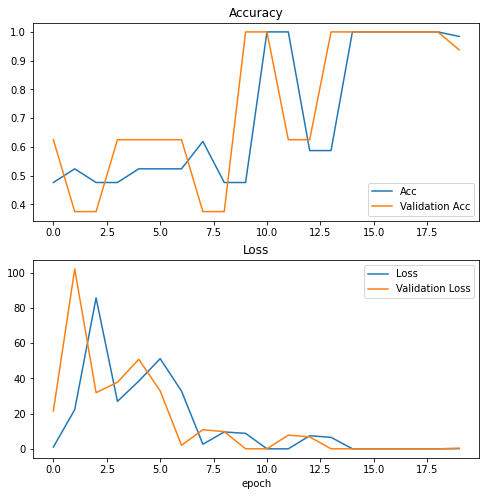

In [30]:
from keras.callbacks import EarlyStopping
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation='relu', input_shape = (train_images.shape[1],)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(train_labels.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer =tf.keras.optimizers.Adam(), metrics=['acc'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

history = model.fit(train_images, train_labels, batch_size = 128, epochs = 50, validation_split = 0.2, callbacks=[early_stopping])
model.save('classification_3_person')
plot_history(history)

In [31]:
print("test loss, test acc:", model.evaluate(test_images, test_labels))

1/1 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - acc: 1.0000
test loss, test acc: [0.0, 1.0]


Text(0.5, 1.0, 'Predict: Thanh')

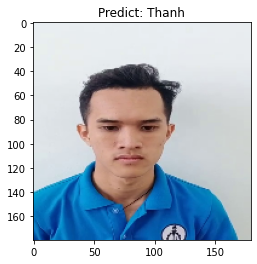

In [32]:
# from tensorflow.keras.preprocessing.image import load_img
img_test = load_image('/content/1class/Thanh/Thanh_112.jpg')

plt.imshow(img_test)

img_test = np.asarray(img_test)
img_test = img_test.reshape(-1)
img_test = img_test / 255
img_test = np.expand_dims(img_test, axis=0)

classe_num = np.argmax(model.predict(img_test))
plt.title("Predict: {}".format(class_names[classe_num]))

Text(0.5, 1.0, 'Predict: Non_Thanh')

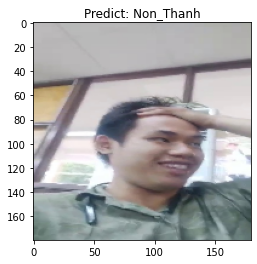

In [33]:
# from tensorflow.keras.preprocessing.image import load_img
img_test = load_image('/content/1class/Non_Thanh/Non_Thanh_216.jpg')

plt.imshow(img_test)

img_test = np.asarray(img_test)
img_test = img_test.reshape(-1)
img_test = img_test / 255
img_test = np.expand_dims(img_test, axis=0)

classe_num = np.argmax(model.predict(img_test))
plt.title("Predict: {}".format(class_names[classe_num]))